# Install

The `wiggle` module lives inside the `huygens` package. To install:

`$ pip install git+https://github.com/punkdit/huygens`

This has only been tested on linux.

The constraint satisfier tends to complain a lot, so we turn off these warnings.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Basic examples

First we make some transparent colors.

In [2]:
from huygens.namespace import *

pink = color.rgba(1.0, 0.37, 0.36, 0.5)
grey = color.rgba(0.85, 0.85, 0.85, 0.5)
cream = color.rgba(1.0, 1.0, 0.92, 0.5)
cyan = color.rgba(0.0, 0.81, 0.80, 0.5)
yellow = color.rgba(1.0, 0.93, 0.4, 0.5)

Objects, 1-morphisms and 2-morphisms are represented as the classes `Cell0`, `Cell1` and `Cell2` respectively. We call these 0-cells, 1-cells and 2-cells.

In [3]:
from huygens.wiggle import Cell0, Cell1, Cell2

0-cells are rendered as 2-dimensional regions.

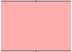

In [4]:
n = Cell0("n", fill=pink)
n

A 1-cell is rendered as a 1-dimensional separating boundary between two 0-cells.

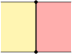

In [5]:
m = Cell0("m", fill=yellow)
A = Cell1(m, n)
A

For horizontal composition of 1-cells we use the python `<<` operator.

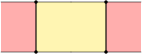

In [6]:
B = Cell1(n, m)
B<<A

2-cells are rendered as a 0-dimensional separating boundary between two 1-cells. 

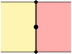

In [7]:
f = Cell2(A, A)
f

These have both a horizontal composition, using `<<` and a vertical composition using the `*` operator.

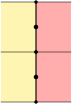

In [8]:
g = Cell2(B, B)
g<<f

f*f

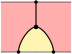

In [9]:
C = Cell1(n, n)
Cell2(C, B<<A)

The monoidal product is rendered in the third dimension, front to back. By default, ``wiggle.py`` switches to an oblique view whenever we have more than one layer.

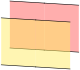

In [10]:
m @ n

Here we show a (co-)multiplication for a pseudomonoid.

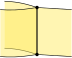

In [11]:
Cell1(m @ m, m)

The (co-)associativity 2-cell is a bit tricky because we need identity 1-cells, and preferably these should be invisible. We do this by setting the ``pip_color`` and ``stroke`` to ``None``.

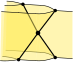

In [12]:
m_m = Cell1(m, m, pip_color=None, stroke=None)
mm_m = Cell1(m @ m, m)
top = (m_m @ mm_m) << (mm_m)
bot = (mm_m @ m_m) << (mm_m)
assoc = Cell2(top, bot, cone=1.)
assoc

The ``cone=1.`` assignment makes the wires coming out of the 2-cell straight, like a cone. By default, these are more curvy. We show this with a Frobeniator 2-cell.

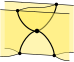

In [13]:
m_mm = Cell1(m, m @ m)
src = mm_m << m_mm
tgt = (m_mm @ m_m) << (m_m @ mm_m)
Cell2(tgt, src)

When we construct a tube, we need an invisible 0-cell to act as the monoidal identity. We call this ``i``:

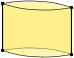

In [14]:
i = Cell0("i", stroke=None)
tube = Cell1(i, m @ m) << Cell1(m @ m, i)
tube

Here we construct a saddle and use it to build a pair-of-pants.

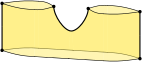

In [15]:
saddle = Cell2(
    Cell1(m @ m, i) << Cell1(i, m @ m),
    m_m @ m_m,
    pip_color=None,
)
lfold = Cell2(Cell1(i, m @ m), Cell1(i, m @ m), pip_color=None)
rfold = Cell2(Cell1(m @ m, i), Cell1(m @ m, i), pip_color=None)
pop = lfold << saddle << rfold
pop

We can take horizontal, vertical, or depth-wise reversal of a cell, by using the methods ``h_rev``, ``v_rev`` or ``d_rev``.

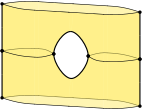

In [16]:
pop.v_rev() * pop

# Cell layout and render

Once we have finished constructing a cell and are ready for rendering, the next thing that happens is the layout in 3-dimensions. This is where the linear programming constraint solver is called. The `layout` method on cell objects has arguments for controlling the overall dimensions.

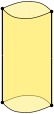

In [17]:
cell = tube.layout(width=1, height=1, depth=1)
cell

After layout comes the render, which happens in the method `render_cvs`. This has argument `pos` which changes the point-of-view.

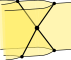

In [18]:
assoc.render_cvs(pos="northwest")

The default is orthographic projection, but we can also do non-orthographic projection for a more cinematic effect.

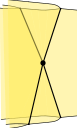

In [19]:
#TODO: pip_radius default is too small for projective render
cell = assoc(pip_radius=0.2).layout(height=1) 

cell.render_cvs(ortho=False, eyepos=[-0.8, -2., 0])

# More constraints

The pair-of-pants above can be further customized by adding more linear constraints. An example of this is in the helper functions `make_pants`, `make_tube`, and `make_pants_rev`.

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./941042420e1827832fbce7a1e3e4e33c11487cc9.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/l3bac

}]
(./28f274905d588440109e62c27c3981f59f5b41c7.aux) )</usr/share/texlive/texmf-dis
t/fonts/type1/public/amsfonts/cm/cmr10.pfb>
Output written on 28f274905d588440109e62c27c3981f59f5b41c7.pdf (1 page, 9221 by
tes).
Transcript written on 28f274905d588440109e62c27c3981f59f5b41c7.log.


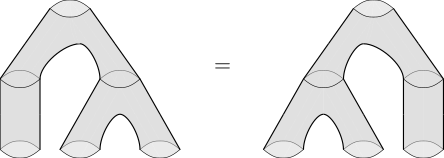

In [20]:
from huygens.wiggle import make_pants, make_tube

m = Cell0("m", fill=grey)
pop = make_pants(m)
tube = make_tube(m)
lhs = pop * (tube << pop)
rhs = pop * (pop << tube)
lhs = lhs.layout(width=2, height=1.5, depth=1).render_cvs(pos="north")
rhs = rhs.layout(width=2, height=1.5, depth=1).render_cvs(pos="north")

cvs = Canvas().insert(0, 0, lhs).insert(10, 0, rhs)
cvs.text(6.5, 2, "$=$", [Scale(2.0)])

# Decorating the vertices 

We can put labels in the vertex, or an arbitrary decoration. This is done using a `Canvas` object. The cell vertex is called the "pip".

In [21]:
p = path.circle(0, 0, 0.2)
cvs = Canvas().fill(p, [white]).stroke(p).text(0, 0, "$a$", st_center)
cvs

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./e2142a8fe798d4952782b6fdc1e8d2d9f4d10146.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/l3bac

We also can override cell's attribute (producing a copy of the object) using the call syntax.

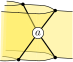

In [22]:
assoc(pip_cvs=cvs)

# More examples

We use the `st_braid` stroke style to show a braid of objects in a monoidal bicategory.

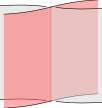

In [23]:
from huygens.wiggle import st_braid

pos = "northwest"
eyepos=[0.6,-3,1]

l = Cell0("l", fill=pink)
m = Cell0("m", fill=grey)

m_ = m(st_stroke=st_braid)
l_ = l(st_stroke=st_braid)

l_l = Cell1(l, l, pip_color=None, stroke=None)
m_m = Cell1(m, m, pip_color=None, stroke=None)

Rneg = Cell1( l@m_, m_@l, pip_color=None, st_stroke=st_dotted)
Rpos = Cell1( m_@l, l@m_, pip_color=None, st_stroke=st_dotted)

b_neg = Cell2(Rneg, Rneg, pip_color=None)
b_neg.layout(width=1, height=1).render_cvs(pos=pos)

And the unbraid 2-cell.

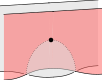

In [24]:
tgt = l_l @ m_m
b_plus = Cell2(tgt, Rneg << Rpos, cone=0.5)
b_plus_i = Cell2(Rneg << Rpos, tgt, cone=0.5)
b_plus.layout(width=1, height=0.7).render_cvs(pos=pos)

A small portion of the Zamolodchikov tetrahedral equation served to stress test the whole system. This example already uses over 1000 variables in the constraint satisfaction.

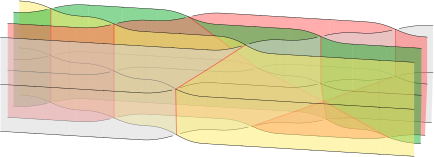

In [25]:
alpha = 0.5
green = color.rgb(0.1, 0.7, 0.2, alpha)
blue = color.rgba(0.0, 0.37, 0.90, alpha)
pink = color.rgba(1.0, 0.37, 0.36, alpha)
grey = color.rgba(0.85, 0.85, 0.85, alpha)
cream = color.rgba(1.0, 1.0, 0.92, alpha)
cyan = color.rgba(0.0, 0.81, 0.80, alpha)
yellow = color.rgba(1.0, 0.93, 0.4, alpha)

Cell2.pip_color = None
Cell2.cone = 1.

l = Cell0("l", fill=yellow, st_stroke=st_thin)
m = Cell0("m", fill=green, st_stroke=st_thin)
n = Cell0("n", fill=pink, st_stroke=st_thin)
o = Cell0("o", fill=grey, st_stroke=st_thin)

l_l = Cell1(l, l, pip_color=None, stroke=None)
m_m = Cell1(m, m, pip_color=None, stroke=None)
n_n = Cell1(n, n, pip_color=None, stroke=None)
o_o = Cell1(o, o, pip_color=None, stroke=None)

l_ = l(st_stroke = st_braid+st_thin)
m_ = m(st_stroke = st_braid+st_thin)
n_ = n(st_stroke = st_braid+st_thin)
o_ = o(st_stroke = st_braid+st_thin)

def braid(n, o):
    o_ = o(st_stroke = st_braid+st_thin)
    on_no = Cell1( o_@n , n@o_ , pip_color=None, st_stroke=st_thick+[red.alpha(0.5)])
    return on_no

cell = (l_l @ m_m @ braid(n, o)).extrude()
cell = (l_l @ braid(m, o) @ n_n).extrude() << cell
cell = (
    Cell2((o_o@l_l)<<braid(l,o), braid(l,o)<<(l_l@o_o)) @
    Cell2(braid(m,n)<<(m_m@n_n), (n_n@m_m)<<braid(m,n))) << cell
cell = (o_o @ braid(l,n) @ m_m).extrude() << cell
cell = (o_o @ n_n @ braid(l,m)).extrude() << cell
top = cell

def yb(m,n,o):
    tgt = (o_o @ braid(m,n)) << (braid(m,o) @ n_n) << (m_m @ braid(n,o))
    src = (braid(n,o) @ m_m) << (n_n @ braid(m,o)) << (braid(m,n) @ o_o)
    cell = Cell2(tgt, src)
    return cell

bot = (l_l<<l_l<<l_l).extrude() @ yb(m,n,o)
bot = (
    (o_o @ n_n @ braid(l,m)).extrude() <<
    (o_o @ braid(l,n) @ m_m).extrude() <<
    (braid(l,o) @ n_n @ m_m).extrude() << bot)

top * bot

# Cell attributes

Default values for various attributes can be set on the `class`es themselves.

In [26]:
from huygens.wiggle import black, st_normal, st_Thick

class Atom(object):
    " abstract base class for all cell objects "


class Cell0(Atom):
    "These are the 0-cells, or object's."

    fill = None
    stroke = black
    st_stroke = st_normal
    pip_cvs = None
    on_constrain = None


class Cell1(Atom):
    stroke = black
    st_stroke = st_Thick
    pip_color = black
    pip_radius = 0.06
    pip_cvs = None
    on_constrain = None


class Cell2(Atom):
    pip_color = black
    pip_radius = 0.08
    pip_cvs = None
    cone = 0.6 # closer to 1. is more cone-like
    on_constrain = None

now remember the real classes

In [27]:
from huygens.wiggle import Cell0, Cell1, Cell2

# Saving output

From any `Cell0`, `Cell1`, or `Cell2` object, we can extract a `Canvas` object which knows how to write a file to disk.

In [28]:
cell = Cell0("n", fill=pink)
cvs = cell.render_cvs()
cvs.writePDFfile("cell.pdf")
cvs.writeSVGfile("cell.svg")
cvs.writePNGfile("cell.png")